## Alpha Levels

In [65]:
import json
with open('alpha_1_experiment.json', 'r') as file:
    data = json.load(file)

data[0].keys()

dict_keys(['dataset', 'n_labels', 'corruption_rate', 'alpha', 'seed', 'final_test_elbo', 'final_test_accuracy', 'train_elbos', 'test_elbos', 'test_accuracies', 'disentanglement_metrics', 'config'])

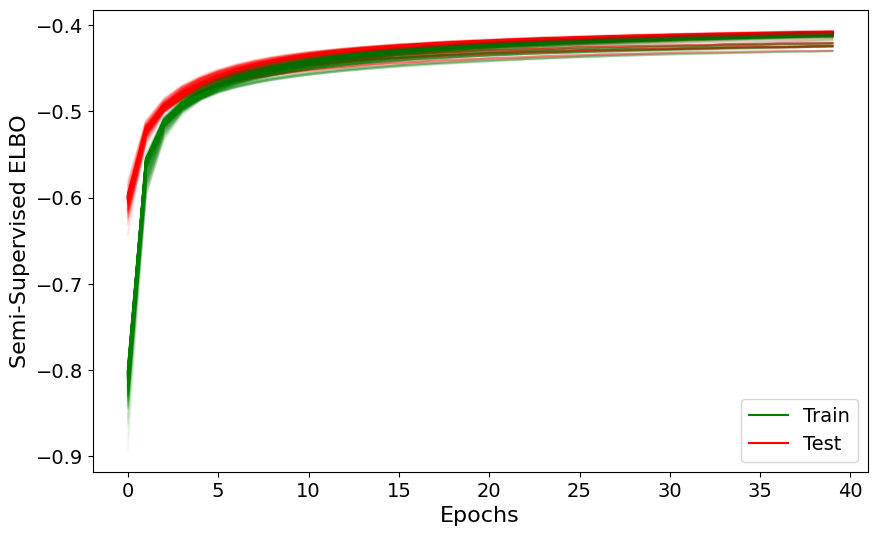

In [66]:
import random
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})
sample = random.sample(data, 20)

plt.figure(figsize=(10, 6))
for i, item in enumerate(data):
    plt.plot(item['train_elbos'], c='green', alpha=0.05, label='Train' if i == 0 else "")
    plt.plot(item['test_elbos'], c='red', alpha=0.05, label='Test' if i == 0 else "")
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Semi-Supervised ELBO', fontsize=16)
leg = plt.legend()
for line in leg.get_lines():
    line.set_alpha(1)
plt.savefig('./figures/alpha_train.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [67]:
import pandas as pd

df = pd.json_normalize(data)
df.alpha = df.alpha.astype(float)

# Select grouping keys and flattened disentanglement metrics
group_cols = ['n_labels', 'alpha']
metric_cols = [c for c in df.columns if c.startswith('disentanglement_metrics')] + ['final_test_elbo', 'final_test_accuracy']

# Aggregate with mean and std
grouped_df = df.groupby(group_cols)[metric_cols]
summary_df = grouped_df.agg(['mean', 'std'])
summary_df_var = grouped_df.agg(['mean', 'var'])
summary_df_flat = summary_df_var.copy()
summary_df

disentanglement_metrics.beta_vae            \
                                           mean       std   
n_labels alpha                                              
100      0.1                           0.177889  0.015674   
         0.5                           0.172222  0.020055   
         1.0                           0.173667  0.018519   
         10.0                          0.163222  0.024374   
         25.0                          0.154111  0.032639   
         50.0                          0.151667  0.036863   
         75.0                          0.148556  0.040386   
         100.0                         0.143556  0.044103   
600      0.1                           0.167111  0.018161   
         0.5                           0.155111  0.017239   
         1.0                           0.159333  0.017350   
         10.0                          0.133778  0.025821   
         25.0                          0.115333  0.030680   
         50.0                          0.102111  0.025769   
         75.0                          0.095111  0.025197   
         100.0                         0.091889  0.026320   
1000     0.1                           0.156556  0.019069   
         0.5                           0.150667  0.018763   
         1.0                           0.146889  0.019158   
         10.0                          0.126222  0.026791   
         25.0                          0.092000  0.011768   
         50.0                          0.091111  0.018747   
         75.0                          0.085889  0.018644   
         100.0                         0.081111  0.012819   
3000     0.1                           0.150222  0.027680   
         0.5                           0.131667  0.014983   
         1.0                           0.126889  0.017362   
         10.0                          0.086889  0.007605   
         25.0                          0.078333  0.005192   
         50.0                          0.073778  0.004947   
         75.0                          0.070444  0.005814   
         100.0                         0.073667  0.010875   

               disentanglement_metrics.factor_vae            \
                                             mean       std   
n_labels alpha                                                
100      0.1                             0.548860  0.062041   
         0.5                             0.526066  0.075484   
         1.0                             0.512488  0.089483   
         10.0                            0.453257  0.151536   
         25.0                            0.418055  0.186026   
         50.0                            0.393371  0.211510   
         75.0                            0.366587  0.236669   
         100.0                           0.357784  0.245723   
600      0.1                             0.453421  0.046405   
         0.5                             0.416977  0.061726   
         1.0                             0.396781  0.066532   
         10.0                            0.270041  0.107390   
         25.0                            0.193638  0.127530   
         50.0                            0.142352  0.138338   
         75.0                            0.124592  0.140803   
         100.0                           0.114420  0.142510   
1000     0.1                             0.417334  0.060560   
         0.5                             0.372162  0.068486   
         1.0                             0.346931  0.070000   
         10.0                            0.213018  0.084615   
         25.0                            0.118499  0.071174   
         50.0                            0.083612  0.054157   
         75.0                            0.070559  0.042186   
         100.0                           0.064003  0.035264   
3000     0.1                             0.302189  0.046598   
         0.5                             0.249096  0.049685   
         1.0                             0.219427  0

In [68]:
id_cols = ['alpha', 'n_labels', 'seed']
print(df.sort_values(by=id_cols)[id_cols+metric_cols].style.format(precision=2).format_index(precision=1).hide(axis="index").to_latex().replace("disentanglement_metrics.","").replace("_"," "))

\begin{tabular}{rrrrrrrr}
alpha & n labels & seed & beta vae & factor vae & mig & final test elbo & final test accuracy \\
0.10 & 100 & 42 & 0.19 & 0.54 & 0.02 & -0.42 & 0.33 \\
0.10 & 100 & 43 & 0.19 & 0.57 & 0.05 & -0.42 & 0.03 \\
0.10 & 100 & 44 & 0.17 & 0.64 & 0.15 & -0.43 & 0.10 \\
0.10 & 100 & 45 & 0.16 & 0.52 & 0.10 & -0.42 & 0.04 \\
0.10 & 100 & 46 & 0.18 & 0.43 & 0.20 & -0.41 & 0.38 \\
0.10 & 100 & 47 & 0.17 & 0.52 & 0.03 & -0.42 & 0.26 \\
0.10 & 100 & 48 & 0.17 & 0.50 & 0.11 & -0.42 & 0.15 \\
0.10 & 100 & 49 & 0.18 & 0.60 & 0.02 & -0.42 & 0.08 \\
0.10 & 100 & 50 & 0.16 & 0.56 & 0.03 & -0.42 & 0.38 \\
0.10 & 100 & 51 & 0.21 & 0.61 & 0.12 & -0.42 & 0.10 \\
0.10 & 600 & 42 & 0.17 & 0.46 & 0.04 & -0.41 & 0.49 \\
0.10 & 600 & 43 & 0.17 & 0.48 & 0.04 & -0.41 & 0.31 \\
0.10 & 600 & 44 & 0.15 & 0.37 & 0.01 & -0.41 & 0.47 \\
0.10 & 600 & 45 & 0.16 & 0.52 & 0.10 & -0.42 & 0.04 \\
0.10 & 600 & 46 & 0.18 & 0.43 & 0.20 & -0.41 & 0.38 \\
0.10 & 600 & 47 & 0.16 & 0.45 & 0.01 & -0.41 & 0.35 

In [69]:
print(summary_df.style
      .format(precision=2)        
      .format_index(precision=1)  
      .to_latex(hrules=True).replace("_"," "))    

\begin{tabular}{llrrrrrrrrrr}
\toprule
 &  & \multicolumn{2}{r}{disentanglement metrics.beta vae} & \multicolumn{2}{r}{disentanglement metrics.factor vae} & \multicolumn{2}{r}{disentanglement metrics.mig} & \multicolumn{2}{r}{final test elbo} & \multicolumn{2}{r}{final test accuracy} \\
 &  & mean & std & mean & std & mean & std & mean & std & mean & std \\
n labels & alpha &  &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[c]{8}{*}{100} & 0.1 & 0.18 & 0.02 & 0.55 & 0.06 & 0.08 & 0.06 & -0.42 & 0.01 & 0.19 & 0.14 \\
 & 0.5 & 0.17 & 0.02 & 0.53 & 0.08 & 0.08 & 0.07 & -0.42 & 0.01 & 0.23 & 0.18 \\
 & 1.0 & 0.17 & 0.02 & 0.51 & 0.09 & 0.09 & 0.08 & -0.42 & 0.01 & 0.24 & 0.20 \\
 & 10.0 & 0.16 & 0.02 & 0.45 & 0.15 & 0.08 & 0.06 & -0.42 & 0.01 & 0.29 & 0.26 \\
 & 25.0 & 0.15 & 0.03 & 0.42 & 0.19 & 0.08 & 0.06 & -0.42 & 0.01 & 0.35 & 0.30 \\
 & 50.0 & 0.15 & 0.04 & 0.39 & 0.21 & 0.07 & 0.05 & -0.42 & 0.01 & 0.39 & 0.35 \\
 & 75.0 & 0.15 & 0.04 & 0.37 & 0.24 & 0.07 & 0.05 & -0.42 & 0.01 & 0.

In [70]:
# import matplotlib.pyplot as plt

# # Flatten MultiIndex columns (e.g., ('metric', 'mean') -> 'metric_mean')
# summary_df_flat = summary_df.copy()
# summary_df_flat.columns = ['_'.join(col).strip() for col in summary_df_flat.columns.values]
# df_plot = summary_df_flat.reset_index()

# # Identify unique metrics
# metrics = [c.replace('_mean', '') for c in df_plot.columns if c.endswith('_mean')]
# alphas = sorted(df_plot['alpha'].unique())
# alpha_to_idx = {rate: i for i, rate in enumerate(alphas)}

# # Create subplots
# # fig, axes = plt.subplots(1, len(metrics), figsize=(6 * len(metrics), 3), constrained_layout=True)

# for metric in metrics:
#     fig, ax = plt.subplots(figsize=(7, 4)) #, constrained_layout=True
#     for n_label, grp in df_plot.groupby('n_labels'):
#         ax.errorbar(
#             grp['alpha'].map(alpha_to_idx), 
#             grp[f'{metric}_mean'], 
#             yerr=grp[f'{metric}_var'], 
#             label=f'n_labels={n_label}', 
#             capsize=5, 
#             marker='o'
#         )
#     # ax.set_xscale('log')
#     ax.set_xticks(range(len(alphas)))
#     ax.set_xticklabels(alphas)
#     # ax.set_xticks(alphas)
#     # ax.set_xticklabels(alphas)
#     ax.set_xlabel('Alpha')
#     ax.set_ylabel(metric.split(".")[-1].replace('_', ' ').title())
#     # plt.savefig(f'alpha_metric_{metric.split(".")[-1]}.pdf', format='pdf', bbox_inches='tight')
#     ax.legend(ncol=2)#, loc='upper center', bbox_to_anchor=(0.5, -0.2))
#     # plt.tight_layout()
#     # plt.savefig(f'alpha_metric_{metric.split(".")[-1]}.png', dpi=300)
#     plt.savefig(f'alpha_metric_{metric.split(".")[-1]}.pdf', format='pdf', bbox_inches='tight')
#     plt.show()

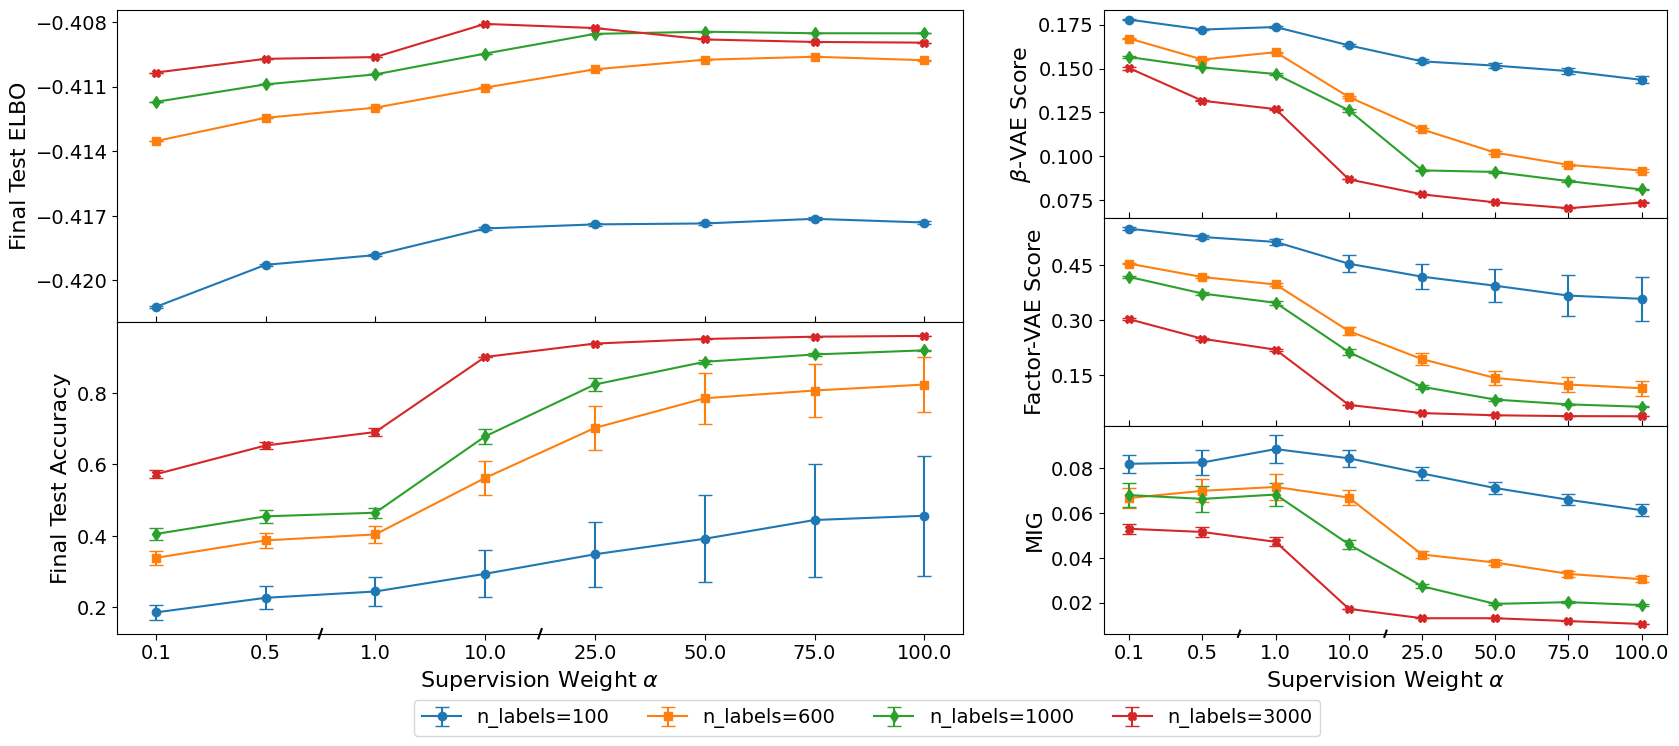

In [71]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Data Preparation
summary_df_flat.columns = ['_'.join(col).strip() for col in summary_df_flat.columns.values]
df_plot = summary_df_flat.reset_index()

alphas = sorted(df_plot['alpha'].unique())
alpha_to_idx = {rate: i for i, rate in enumerate(alphas)}

metrics_left = ['disentanglement_metrics.beta_vae', 'disentanglement_metrics.factor_vae', 'disentanglement_metrics.mig']
metrics_right = ['final_test_elbo', 'final_test_accuracy']

# Create Figure
fig = plt.figure(figsize=(20, 8)) 
gs = fig.add_gridspec(1, 2, width_ratios=[1.5, 1], wspace=0.2) 
gs_left = gs[1].subgridspec(3, 1, hspace=0)

ax_l0 = fig.add_subplot(gs_left[0])
ax_l1 = fig.add_subplot(gs_left[1], sharex=ax_l0)
ax_l2 = fig.add_subplot(gs_left[2], sharex=ax_l0)
axes_left = [ax_l0, ax_l1, ax_l2]


gs_right = gs[0].subgridspec(2, 1, hspace=0)

ax_r0 = fig.add_subplot(gs_right[0])
ax_r1 = fig.add_subplot(gs_right[1], sharex=ax_r0)
axes_right = [ax_r0, ax_r1]

def add_break_mark(ax, x_position):
    d = .015  
    kwargs = dict(transform=ax.get_xaxis_transform(), color='k', clip_on=False)
    ax.plot([x_position - d, x_position + d], [-d, +d], **kwargs)
    # ax.plot([x_position - d, x_position + d], [1 - d, 1 + d], **kwargs)

def plot_metrics(axes_list, metrics_list):
    handles, labels = None, None
    for i, (ax, metric) in enumerate(zip(axes_list, metrics_list)):
        for n_label, grp in df_plot.groupby('n_labels'):
            marker_dict = {100: 'o', 600: 's', 1000: 'd', 3000: 'X'}
            ax.errorbar(
                grp['alpha'].map(alpha_to_idx), 
                grp[f'{metric}_mean'], 
                yerr=grp[f'{metric}_var'], 
                label=f'n_labels={n_label}', 
                capsize=5, 
                marker=marker_dict[n_label]
            )
        y_label = metric.split(".")[-1].replace('_', ' ').title()
        y_label_dict = {
            'Beta Vae': r'$\beta$-VAE Score',
            'Factor Vae': 'Factor-VAE Score',
            'Mig': 'MIG',
            'Final Test Elbo': 'Final Test ELBO',
            'Final Test Accuracy': 'Final Test Accuracy'
        }
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
        ax.set_ylabel(y_label_dict[y_label], fontsize=16)
        ax.set_xticks(range(len(alphas)))
        
        if i < len(axes_list) - 1:
            plt.setp(ax.get_xticklabels(), visible=False)
            ax.tick_params(axis='x', direction='in', length=4)
        else:
            ax.set_xticklabels(alphas)
            ax.set_xlabel(r'Supervision Weight $\alpha$', fontsize=16)
            ax.tick_params(axis='x', direction='out', length=4)
            try:
                idx_05 = alphas.index(0.5)
                idx_1 = alphas.index(1.0)
                add_break_mark(ax, (idx_05 + idx_1) / 2)
            except ValueError: pass

            try:
                idx_10 = alphas.index(10.0)
                idx_25 = alphas.index(25.0)
                add_break_mark(ax, (idx_10 + idx_25) / 2)
            except ValueError: pass
        if handles is None:
            handles, labels = ax.get_legend_handles_labels()
            
    return handles, labels

handles_l, labels_l = plot_metrics(axes_left, metrics_left)
handles_r, labels_r = plot_metrics(axes_right, metrics_right)

fig.legend(handles_l, labels_l, loc='lower center', bbox_to_anchor=(0.5, -0.04), ncol=4, bbox_transform=fig.transFigure)

plt.subplots_adjust(bottom=0.1) 
plt.savefig('./figures/combined_alpha_metrics.pdf', format='pdf', bbox_inches='tight')
plt.show()

## Noise Levels

In [72]:
import json
with open('noise_1_experiment.json', 'r') as file:
    data = json.load(file)

data[0].keys()

dict_keys(['dataset', 'n_labels', 'corruption_rate', 'alpha', 'seed', 'final_test_elbo', 'final_test_accuracy', 'train_elbos', 'test_elbos', 'test_accuracies', 'disentanglement_metrics', 'config'])

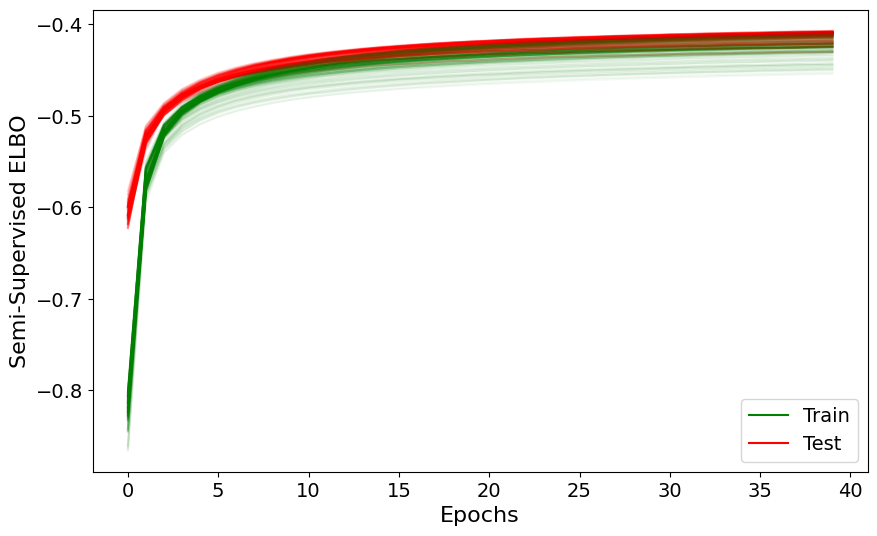

In [73]:
import random
import matplotlib.pyplot as plt

sample = random.sample(data, 20)

plt.figure(figsize=(10, 6))
for i, item in enumerate(data):
    plt.plot(item['train_elbos'], c='green', alpha=0.05, label='Train' if i == 0 else "")
    plt.plot(item['test_elbos'], c='red', alpha=0.05, label='Test' if i == 0 else "")
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Semi-Supervised ELBO', fontsize=16)
leg = plt.legend()
for line in leg.get_lines():
    line.set_alpha(1)
plt.savefig('./figures/noise_train.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [74]:
import pandas as pd

df = pd.json_normalize(data)

# Select grouping keys and flattened disentanglement metrics
group_cols = ['n_labels', 'corruption_rate']
metric_cols = [c for c in df.columns if c.startswith('disentanglement_metrics')] + ['final_test_elbo', 'final_test_accuracy']

# Aggregate with mean and std
summary_df = df.groupby(group_cols)[metric_cols].agg(['mean', 'std'])
summary_df_var = df.groupby(group_cols)[metric_cols].agg(['mean', 'var'])
summary_df

disentanglement_metrics.beta_vae            \
                                                     mean       std   
n_labels corruption_rate                                              
100      0.00                                    0.151667  0.036863   
         0.01                                    0.152000  0.038346   
         0.10                                    0.151778  0.036912   
         0.20                                    0.152667  0.034316   
         0.50                                    0.164333  0.024464   
         1.00                                    0.176889  0.016512   
600      0.00                                    0.102111  0.025769   
         0.01                                    0.098778  0.026915   
         0.10                                    0.104667  0.026957   
         0.20                                    0.115556  0.026068   
         0.50                                    0.134889  0.022778   
         1.00                                    0.178222  0.027598   
1000     0.00                                    0.091111  0.018747   
         0.01                                    0.089778  0.022153   
         0.10                                    0.099444  0.019053   
         0.20                                    0.104556  0.017820   
         0.50                                    0.124222  0.016303   
         1.00                                    0.182889  0.020742   
3000     0.00                                    0.073778  0.004947   
         0.01                                    0.076000  0.006893   
         0.10                                    0.091556  0.011249   
         0.20                                    0.098333  0.011003   
         0.50                                    0.139556  0.022645   
         1.00                                    0.194778  0.015298   

                         disentanglement_metrics.factor_vae            \
                                                       mean       std   
n_labels corruption_rate                                                
100      0.00                                      0.393371  0.211510   
         0.01                                      0.398177  0.207491   
         0.10                                      0.408050  0.198154   
         0.20                                      0.420966  0.184042   
         0.50                                      0.468574  0.134709   
         1.00                                      0.549462  0.061825   
600      0.00                                      0.142352  0.138338   
         0.01                                      0.145756  0.137242   
         0.10                                      0.166516  0.131817   
         0.20                                      0.185367  0.125708   
         0.50                                      0.301218  0.092336   
         1.00                                      0.546274  0.055949   
1000     0.00                                      0.083612  0.054157   
         0.01                                      0.087502  0.058789   
         0.10                                      0.109056  0.058331   
         0.20                                      0.133215  0.055249   
         0.50                                      0.260059  0.061699   
         1.00                                      0.581640  0.049252   
3000     0.00                                      0.040881  0.002885   
         0.01                                      0.041901  0.003617   
         0.10                                      0.065498  0.005549   
         0.20                                      0.097569  0.013340   
         0.50                                      0.326865  0.048918   
         1.00                                      0.610581  0.019326   

                         disentanglement_metrics.mig            \
                                                mean       std   
n_l

In [75]:
id_cols = ['corruption_rate', 'n_labels', 'seed']
print(df.sort_values(by=id_cols)[id_cols+metric_cols].style.format(precision=2).format_index(precision=1).hide(axis="index").to_latex().replace("disentanglement_metrics.","").replace("_"," "))

\begin{tabular}{rrrrrrrr}
corruption rate & n labels & seed & beta vae & factor vae & mig & final test elbo & final test accuracy \\
0.00 & 100 & 42 & 0.13 & 0.20 & 0.02 & -0.41 & 0.71 \\
0.00 & 100 & 43 & 0.19 & 0.57 & 0.05 & -0.42 & 0.03 \\
0.00 & 100 & 44 & 0.17 & 0.64 & 0.15 & -0.43 & 0.10 \\
0.00 & 100 & 45 & 0.16 & 0.52 & 0.10 & -0.42 & 0.04 \\
0.00 & 100 & 46 & 0.09 & 0.09 & 0.09 & -0.41 & 0.87 \\
0.00 & 100 & 47 & 0.12 & 0.26 & 0.01 & -0.41 & 0.56 \\
0.00 & 100 & 48 & 0.14 & 0.23 & 0.12 & -0.41 & 0.73 \\
0.00 & 100 & 49 & 0.18 & 0.60 & 0.02 & -0.42 & 0.08 \\
0.00 & 100 & 50 & 0.13 & 0.22 & 0.02 & -0.41 & 0.70 \\
0.00 & 100 & 51 & 0.21 & 0.61 & 0.12 & -0.42 & 0.10 \\
0.00 & 600 & 42 & 0.09 & 0.09 & 0.02 & -0.41 & 0.86 \\
0.00 & 600 & 43 & 0.07 & 0.09 & 0.01 & -0.41 & 0.89 \\
0.00 & 600 & 44 & 0.08 & 0.05 & 0.01 & -0.41 & 0.92 \\
0.00 & 600 & 45 & 0.16 & 0.52 & 0.10 & -0.42 & 0.04 \\
0.00 & 600 & 46 & 0.09 & 0.09 & 0.09 & -0.41 & 0.87 \\
0.00 & 600 & 47 & 0.10 & 0.11 & 0.03 & -0.

In [76]:
print(summary_df.style
      .format(precision=2)        
      .format_index(precision=1)  
      .to_latex(hrules=True).replace("_"," "))   

\begin{tabular}{llrrrrrrrrrr}
\toprule
 &  & \multicolumn{2}{r}{disentanglement metrics.beta vae} & \multicolumn{2}{r}{disentanglement metrics.factor vae} & \multicolumn{2}{r}{disentanglement metrics.mig} & \multicolumn{2}{r}{final test elbo} & \multicolumn{2}{r}{final test accuracy} \\
 &  & mean & std & mean & std & mean & std & mean & std & mean & std \\
n labels & corruption rate &  &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[c]{6}{*}{100} & 0.0 & 0.15 & 0.04 & 0.39 & 0.21 & 0.07 & 0.05 & -0.42 & 0.01 & 0.39 & 0.35 \\
 & 0.0 & 0.15 & 0.04 & 0.40 & 0.21 & 0.07 & 0.05 & -0.42 & 0.01 & 0.38 & 0.34 \\
 & 0.1 & 0.15 & 0.04 & 0.41 & 0.20 & 0.07 & 0.05 & -0.42 & 0.01 & 0.37 & 0.33 \\
 & 0.2 & 0.15 & 0.03 & 0.42 & 0.18 & 0.08 & 0.05 & -0.42 & 0.01 & 0.35 & 0.31 \\
 & 0.5 & 0.16 & 0.02 & 0.47 & 0.13 & 0.08 & 0.06 & -0.42 & 0.01 & 0.28 & 0.24 \\
 & 1.0 & 0.18 & 0.02 & 0.55 & 0.06 & 0.08 & 0.05 & -0.42 & 0.01 & 0.05 & 0.03 \\
\multirow[c]{6}{*}{600} & 0.0 & 0.10 & 0.03 & 0.14 & 0.14 & 0.

In [77]:
# import matplotlib.pyplot as plt

# # Flatten MultiIndex columns
# summary_df_flat = summary_df.copy()
# summary_df_flat.columns = ['_'.join(col).strip() for col in summary_df_flat.columns.values]
# df_plot = summary_df_flat.reset_index()

# # Identify metrics
# metrics = [c.replace('_mean', '') for c in df_plot.columns if c.endswith('_mean')]

# # Create mapping for equidistant plotting
# corruption_rates = sorted(df_plot['corruption_rate'].unique())
# rate_to_idx = {rate: i for i, rate in enumerate(corruption_rates)}

# # Create subplots
# # fig, axes = plt.subplots(1, len(metrics), figsize=(6 * len(metrics), 3), constrained_layout=True)
# # if len(metrics) == 1: axes = [axes]

# for metric in metrics:
#     fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)
#     for n_label, grp in df_plot.groupby('n_labels'):
#         ax.errorbar(
#             grp['corruption_rate'].map(rate_to_idx), # Use mapped indices here
#             grp[f'{metric}_mean'], 
#             yerr=grp[f'{metric}_var'], 
#             label=f'n_labels={n_label}', 
#             capsize=5, 
#             marker='o'
#         )
    
#     ax.set_xticks(range(len(corruption_rates)))
#     ax.set_xticklabels(corruption_rates)
#     ax.set_xlabel('Corruption Rate')
#     ax.set_ylabel(metric.split(".")[-1].replace('_', ' ').title())
#     ax.legend(ncol=4)#, loc='upper center', bbox_to_anchor=(0.5, -0.2))
#     plt.tight_layout()
#     # plt.savefig(f'corruption_rate_{metric.split(".")[-1]}.png', dpi=300)
#     plt.savefig(f'corruption_rate_{metric.split(".")[-1]}.pdf', format='pdf', bbox_inches='tight')
#     plt.show()

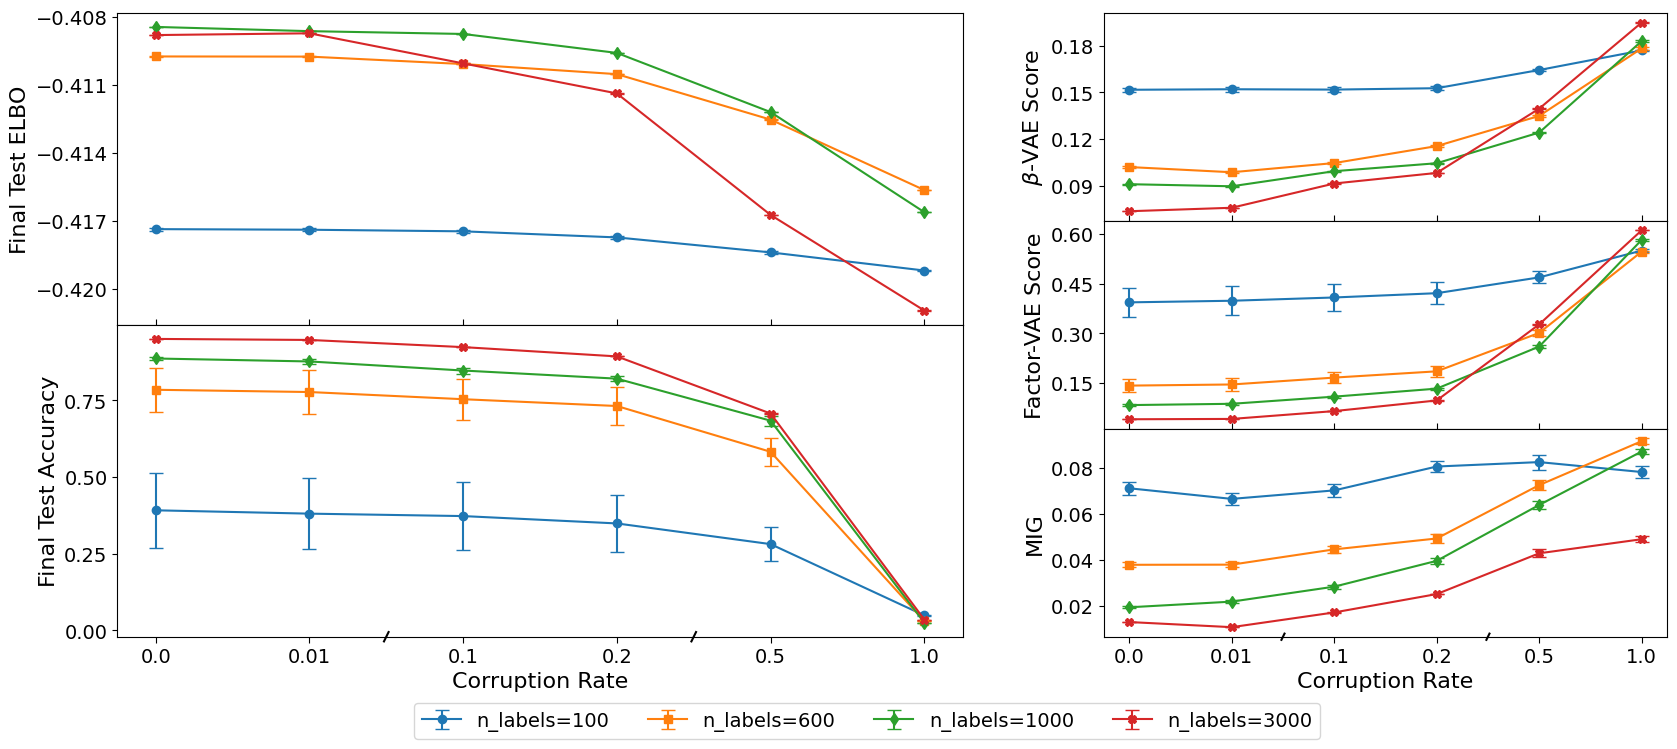

In [78]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Data Preparation
summary_df_flat = summary_df_var.copy()
summary_df_flat.columns = ['_'.join(col).strip() for col in summary_df_flat.columns.values]
df_plot = summary_df_flat.reset_index()

alphas = sorted(df_plot['corruption_rate'].unique())
alpha_to_idx = {rate: i for i, rate in enumerate(alphas)}

metrics_left = ['disentanglement_metrics.beta_vae', 'disentanglement_metrics.factor_vae', 'disentanglement_metrics.mig']
metrics_right = ['final_test_elbo', 'final_test_accuracy']

# Create Figure
fig = plt.figure(figsize=(20, 8)) 
gs = fig.add_gridspec(1, 2, width_ratios=[1.5, 1], wspace=0.2) 

gs_left = gs[1].subgridspec(3, 1, hspace=0)
ax_l0 = fig.add_subplot(gs_left[0])

ax_l1 = fig.add_subplot(gs_left[1], sharex=ax_l0)
ax_l2 = fig.add_subplot(gs_left[2], sharex=ax_l0)
axes_left = [ax_l0, ax_l1, ax_l2]

gs_right = gs[0].subgridspec(2, 1, hspace=0)

ax_r0 = fig.add_subplot(gs_right[0])
ax_r1 = fig.add_subplot(gs_right[1], sharex=ax_r0)
axes_right = [ax_r0, ax_r1]

def add_break_mark(ax, x_position):
    d = .015  
    kwargs = dict(transform=ax.get_xaxis_transform(), color='k', clip_on=False)
    ax.plot([x_position - d, x_position + d], [-d, +d], **kwargs)
    # ax.plot([x_position - d, x_position + d], [1 - d, 1 + d], **kwargs)

def plot_metrics(axes_list, metrics_list):
    handles, labels = None, None
    for i, (ax, metric) in enumerate(zip(axes_list, metrics_list)):
        for n_label, grp in df_plot.groupby('n_labels'):
            marker_dict = {100: 'o', 600: 's', 1000: 'd', 3000: 'X'}
            ax.errorbar(
                grp['corruption_rate'].map(alpha_to_idx), 
                grp[f'{metric}_mean'], 
                yerr=grp[f'{metric}_var'], 
                label=f'n_labels={n_label}', 
                capsize=5, 
                marker=marker_dict[n_label]
            )
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
        y_label = metric.split(".")[-1].replace('_', ' ').title()
        y_label_dict = {
            'Beta Vae': r'$\beta$-VAE Score',
            'Factor Vae': 'Factor-VAE Score',
            'Mig': 'MIG',
            'Final Test Elbo': 'Final Test ELBO',
            'Final Test Accuracy': 'Final Test Accuracy'
        }
        ax.set_ylabel(y_label_dict[y_label], fontsize=16)
        ax.set_xticks(range(len(alphas)))
        
        if i < len(axes_list) - 1:
            plt.setp(ax.get_xticklabels(), visible=False)
            ax.tick_params(axis='x', direction='in', length=4)
        else:
            ax.set_xticklabels(alphas)
            ax.set_xlabel('Corruption Rate', fontsize=16)
            ax.tick_params(axis='x', direction='out', length=4)
            try:
                idx_05 = alphas.index(0.01)
                idx_1 = alphas.index(0.1)
                add_break_mark(ax, (idx_05 + idx_1) / 2) # Place between them
            except ValueError: pass

            try:
                idx_10 = alphas.index(0.2)
                idx_25 = alphas.index(0.5)
                add_break_mark(ax, (idx_10 + idx_25) / 2)
            except ValueError: pass
        if handles is None:
            handles, labels = ax.get_legend_handles_labels()
            
    return handles, labels

handles_l, labels_l = plot_metrics(axes_left, metrics_left)
handles_r, labels_r = plot_metrics(axes_right, metrics_right)

fig.legend(handles_l, labels_l, loc='lower center', bbox_to_anchor=(0.5, -0.04), ncol=4, bbox_transform=fig.transFigure)

plt.subplots_adjust(bottom=0.1) 
plt.savefig('./figures/combined_noise_metrics.pdf', format='pdf', bbox_inches='tight')
plt.show()